In [149]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [151]:
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [152]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [153]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [155]:
data.shape

(51717, 17)

In [156]:
data.dtypes #checking the data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [157]:
data.isna().sum() #Checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [158]:
import pandas_profiling as pf
pf.ProfileReport(data)

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [159]:
#Deleting Unnnecessary Columns
df=data.drop(['url','phone'],axis=1) #Dropping the column like "phone" and "url" and saving the new dataset as "df"

In [160]:
df.duplicated().sum()

43

In [161]:
df.drop_duplicates(inplace=True)

In [162]:
df.duplicated().sum()

0

**Drop null values**

In [163]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Renaming columes appropriately**

In [164]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [165]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [166]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [167]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

**replacing the "," with nothing and converting the results to float**

In [168]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [169]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [170]:
#Reading uninque values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [171]:
df = df.loc[df.rate !='NEW'] #getting rid of "NEW"

In [172]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [173]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

**Visualisations**

Most famous restaurants chains in Bangaluru

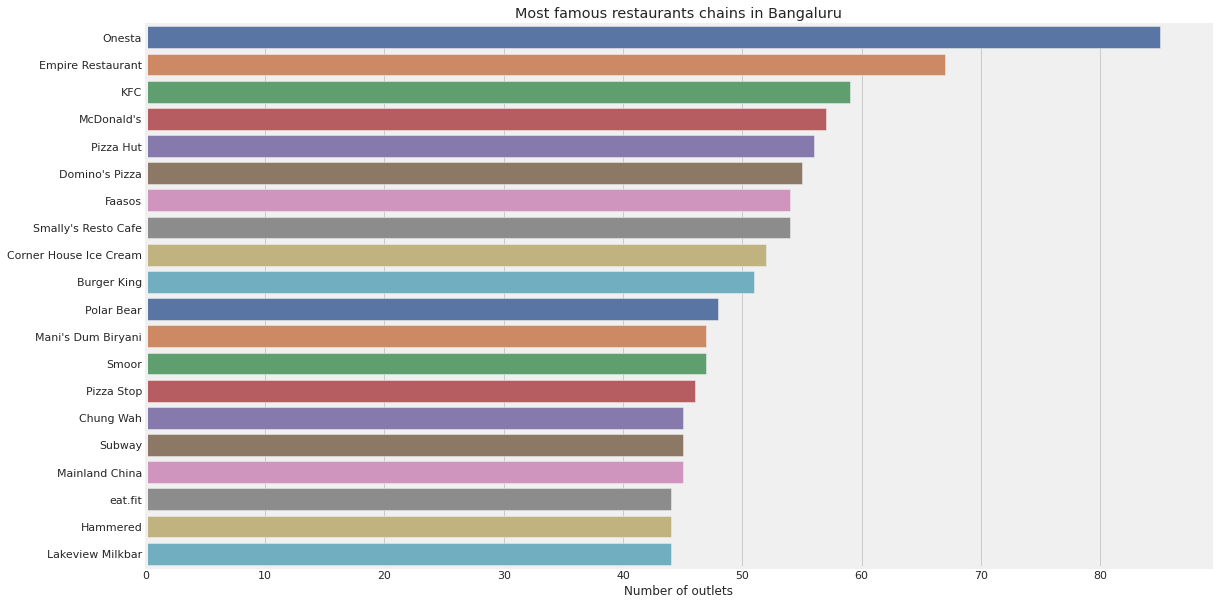

In [174]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

Whether restaurant offer Table booking or not

In [175]:
df['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

In [176]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
             marker=dict(colors=colors, 
                         line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Insight**
 : Most of the Restaurants do not offer table booking

**Whether Restaurants deliver online or Not**

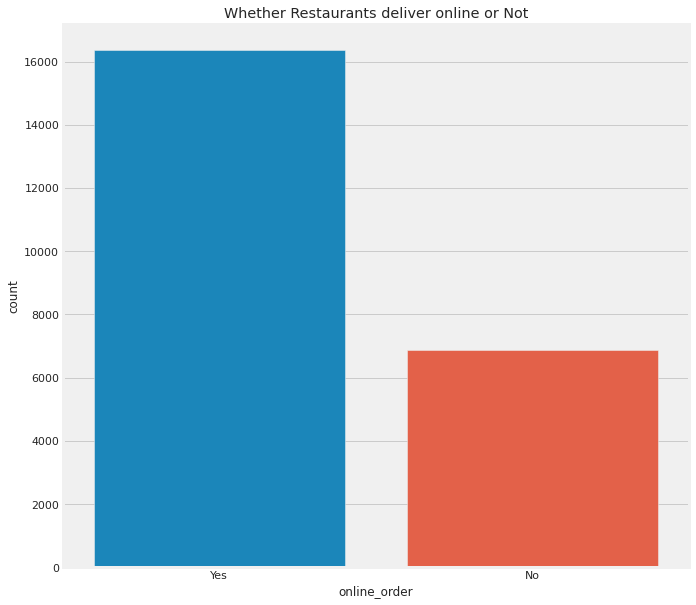

In [177]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

**Insight** : Most Restaurants offer option for online order and delivery

**Rating Distributions**

<AxesSubplot:xlabel='rate', ylabel='Density'>

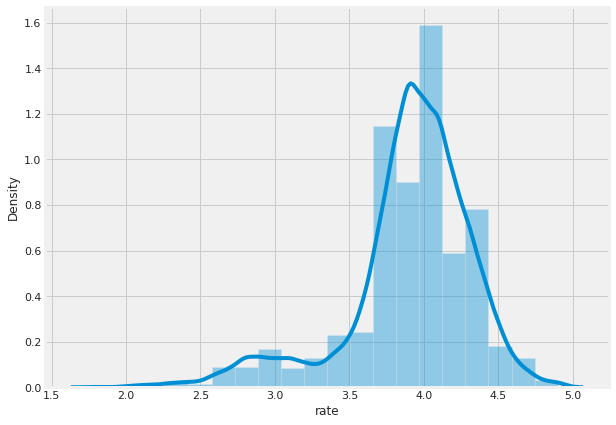

In [178]:
#How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['rate'],bins=20)

**Insight** : We can infer from above that most of the ratings are within 3.5 and 4.5

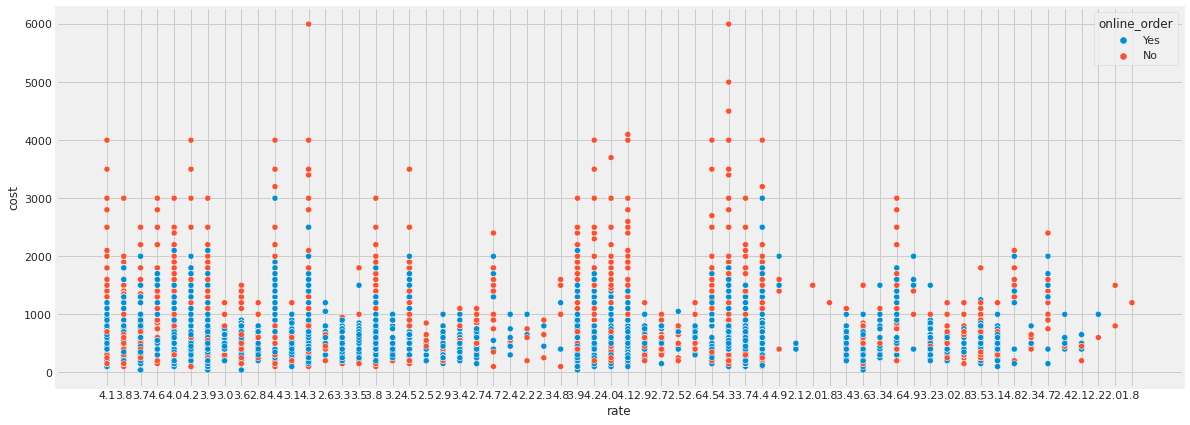

In [179]:
#Distribution of the cost Vs ratings in parallel with online order
plt.figure(figsize=(18,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.show()

In [180]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [181]:
df['rate']=df['rate'].astype(float)

In [182]:
df['rate'].min()

1.8

In [183]:
df['rate'].max()

4.9

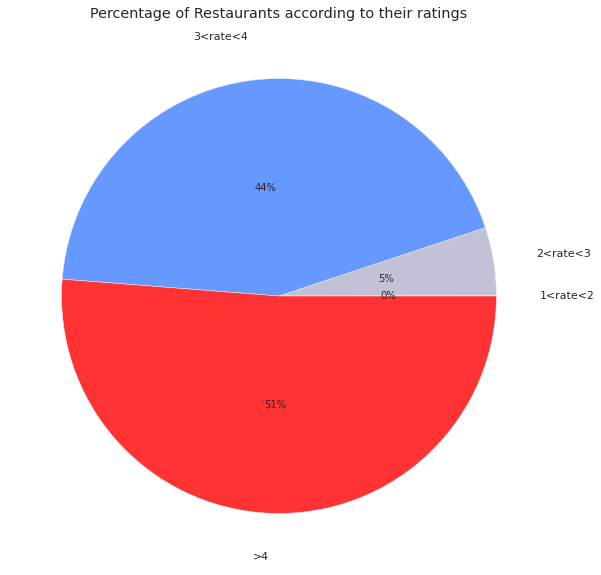

In [184]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

**Services Types**

Text(0.5, 1.0, 'Type of Service')

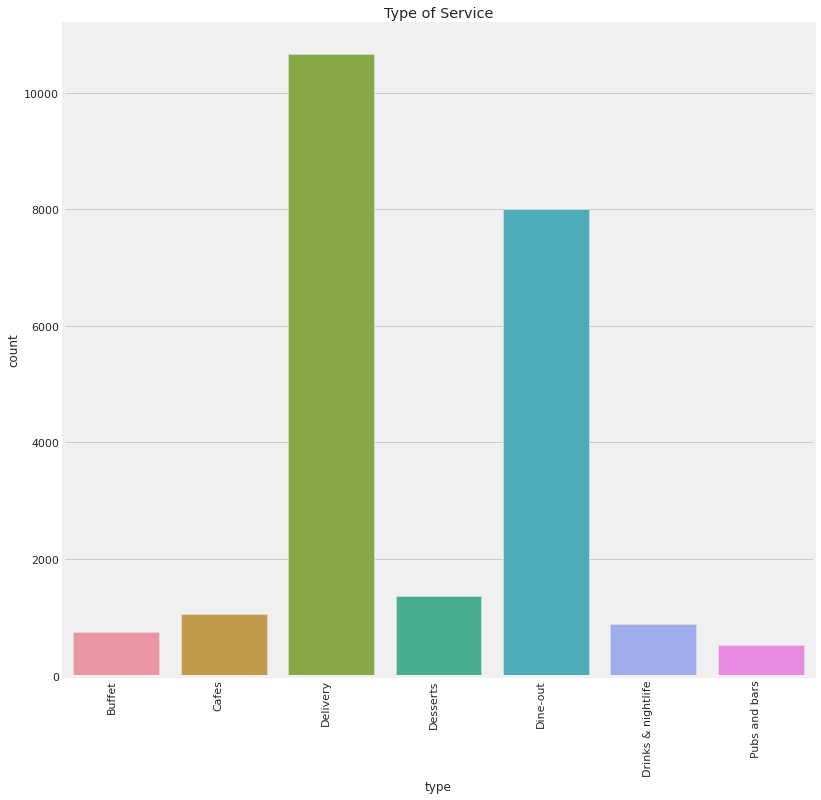

In [185]:
#Types of Services
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

**Insight** : Here the two main service types are Delivery and Dine-out

**Distribution of Cost of Food for two People**

In [186]:
from plotly.offline import iplot

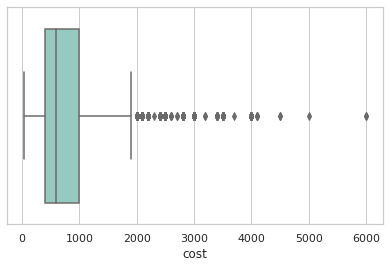

In [187]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['cost'], palette="Set3", dodge=False)

**Distribution of charges**

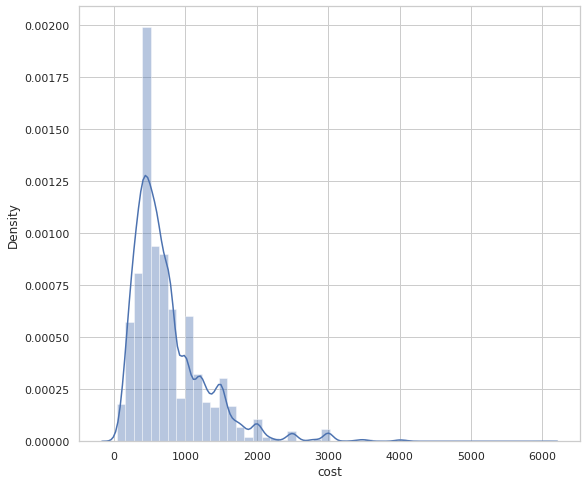

In [188]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

**Most Liked Dishes**

In [189]:
#re=regular expression (use for splitting words)
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [190]:
df.index=range(df.shape[0])

In [191]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [192]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

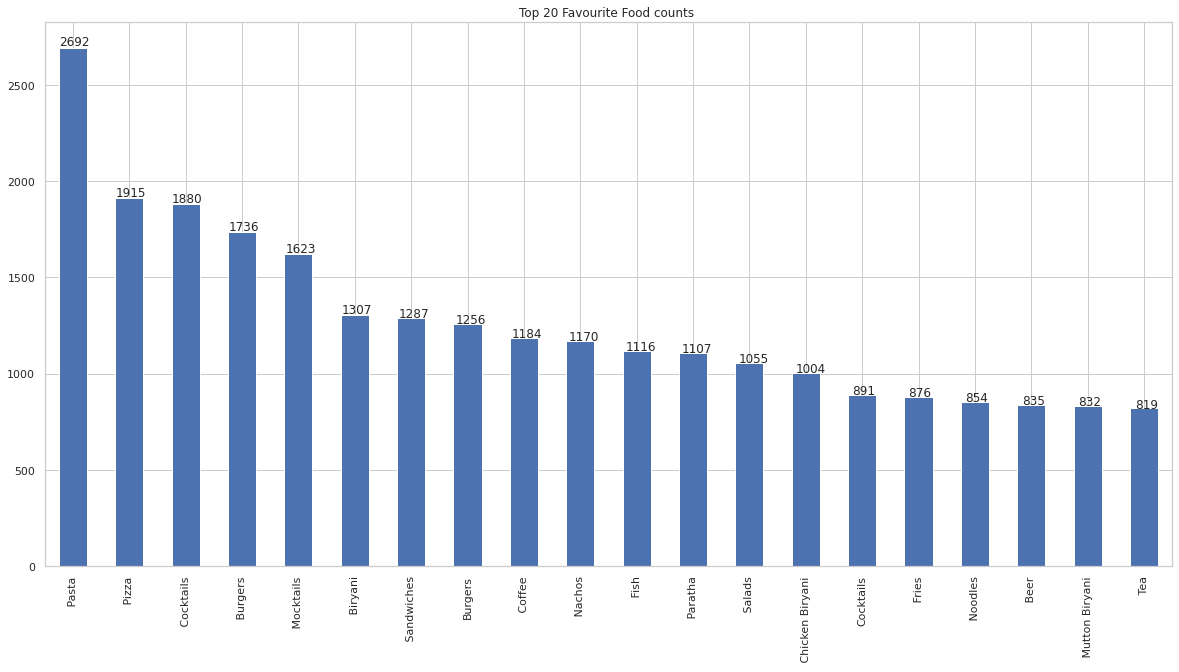

In [193]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 20 Favourite Food counts ')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

We can infer from the analysis that the 5 most liked dishes are Pasta,Pizza,Cocktails,Burgers,and Mocktails

**Restaurant and their counts**

Text(0.5, 0, 'count')

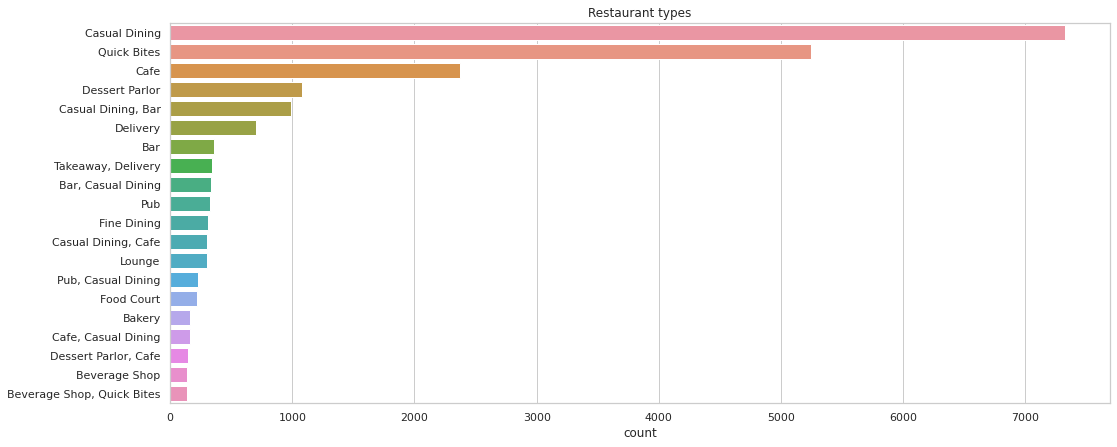

In [194]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

**Casual Dining**, **Quick Bites** and **Cafe** are the 3 most common types of Restaurants in Banglore.

**Most famous Restaurants**

Text(0.5, 0, 'Number of outlets')

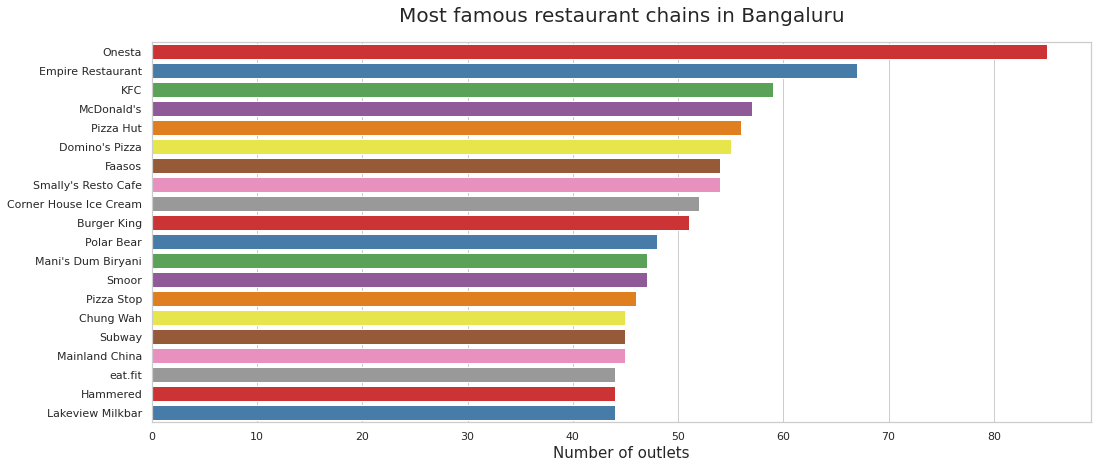

In [195]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

**Building Our Model**

In [196]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [197]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [198]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [199]:
df.online_order = pd.to_numeric(df.online_order)

**change the string categorical into to a categorical int**

In [200]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [201]:
df.book_table = pd.to_numeric(df.book_table)
df.book_table.value_counts()


0    17191
1     6057
Name: book_table, dtype: int64

**Label encode the categorical variables to make it easier to build algorithm**

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [203]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [204]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [205]:
df.iloc[:,[2,3,4,5,6,7,9,10,12]]

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23243,1,1,3.8,128,84,5,1318,1200.0,5047
23244,0,0,3.9,77,84,38,878,2000.0,5047
23245,0,0,2.8,161,84,21,539,1200.0,5047
23246,0,0,2.5,81,84,21,80,800.0,5047


In [206]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [207]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [208]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [210]:
from sklearn.ensemble import ExtraTreesRegressor

In [211]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import model_selection
models=[]
models.append(('ETR', ExtraTreesRegressor()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=6,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,x_train,y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

ETR 0.9009352200779756 0.01435184537591631
SVR 0.2458249977526039 0.00879921420407438
KNN 0.542712098323982 0.028586932796179788
RF 0.8748457612774629 0.01467290387343168
XGBOOST 0.7541541752253035 0.009682439403774949


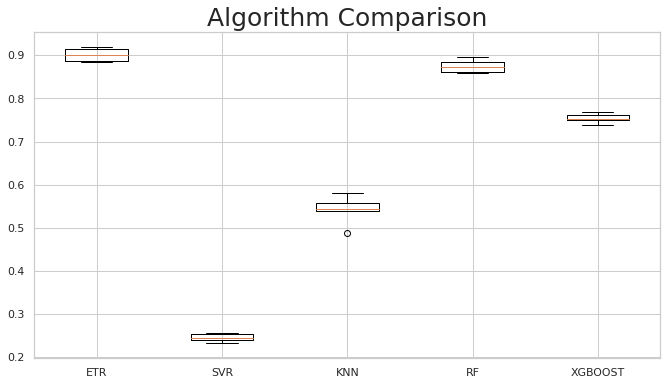

In [212]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see above accuracy score result we can say that ExtraTreesRegressor gives better accuracy with very low standard deviation hence we should go with ExtraTreesRegressor.

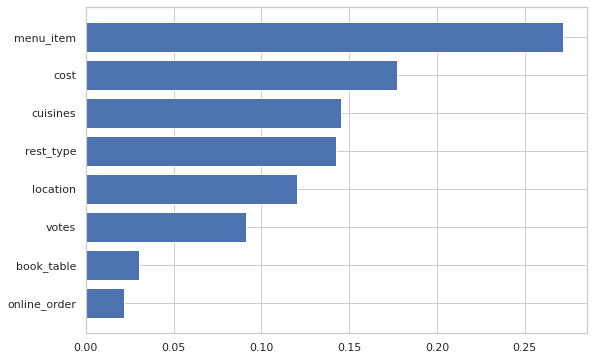

In [213]:
plt.figure(figsize=(8,6))
model=ExtraTreesRegressor()
model.fit(x_train,y_train)
importance=np.sort(model.feature_importances_)
plt.barh(x_train.columns,importance)
plt.show()

**Hyper parameter tuning**

In [214]:
param_grid={'n_estimators': range(50,126,25),
            'min_samples_leaf': range(10,30,5),
            'min_samples_split': range(15,36,5)
           }
from sklearn.model_selection import RandomizedSearchCV
model=ExtraTreesRegressor()
random_cv=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=10,cv=10)
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(),
                   param_distributions={'min_samples_leaf': range(10, 30, 5),
                                        'min_samples_split': range(15, 36, 5),
                                        'n_estimators': range(50, 126, 25)})

In [215]:
random_cv.best_params_

{'n_estimators': 100, 'min_samples_split': 35, 'min_samples_leaf': 10}

In [216]:
from sklearn.metrics import r2_score 
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
Y_train_predicted=ETR.predict(x_train)
Y_test_predicted=ETR.predict(x_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))

Train set accuracy:  0.9997647673791074
Test set accuracy :  0.9316385384487619


<AxesSubplot:xlabel='rate'>

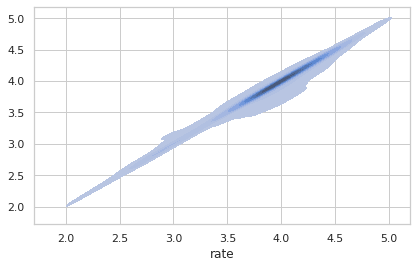

In [217]:
sns.kdeplot(y_test,Y_test_predicted, color='b', shade=True)

In [218]:
# Use pickle to save our model so that we can use it later
import pickle 
# Saving model to disk
pickle.dump(ETR, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))